In [2]:
import numpy as np
from scipy.signal import cheby1, freqz
import matplotlib.pyplot as plt
import sk_dsp_comm.fir_design_helper as fir_d
import sk_dsp_comm.sigsys as ss

Text(0.5, 1.0, 'Chebyshev Type I Lowpass Filter')

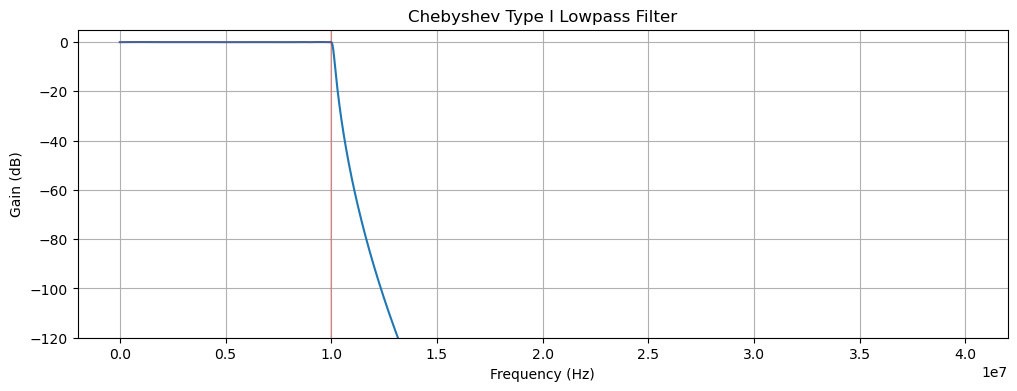

In [3]:
# Sampling parameters
fs = 80000000  # Hz

# Desired filter parameters
order = 20
Apass = 0.05  # dB
fcut = fs/8    # Hz

# Normalized frequency argument for cheby1
wn = fcut / (0.5*fs)

b, a = cheby1(order, Apass, wn)

fir_d.freqz_resp_list([b], [a], mode='dB', fs=fs, n_pts=4096, fsize=(12, 4))
plt.axvline(fcut, color='r', alpha=0.2)
plt.plot([0, fcut], [-Apass, -Apass], color='r', alpha=0.2)
plt.xlabel('Frequency (Hz)')
plt.ylim([-120,5])
plt.ylabel('Gain (dB)')
plt.grid()
plt.title("Chebyshev Type I Lowpass Filter")



<class 'numpy.ndarray'>


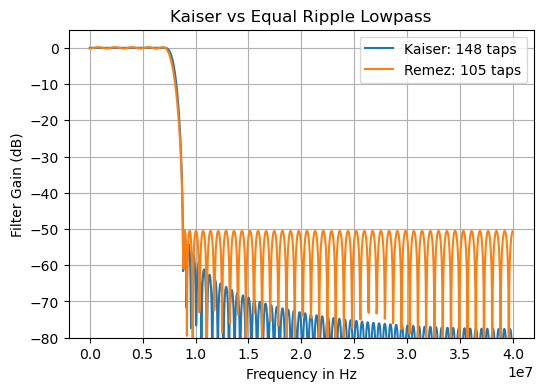

In [12]:
import sk_dsp_comm.fir_design_helper as fir_d
import matplotlib.pyplot as plt

fs = 80000000
fpass = 0.45*fs/5
fstop = 0.55*fs/5
fstopDB = 50 
b_k = fir_d.firwin_kaiser_lpf(fpass,fstop,fstopDB,fs)
b_r = fir_d.fir_remez_lpf(fpass,fstop,0.2,fstopDB,fs)

print(type(b_k))

fir_d.freqz_resp_list([b_k,b_r],[[1],[1]],'dB',fs)
plt.ylim([-80,5])
plt.title(r'Kaiser vs Equal Ripple Lowpass')
plt.ylabel(r'Filter Gain (dB)')
plt.xlabel(r'Frequency in Hz')
plt.legend((r'Kaiser: %d taps' % len(b_k),r'Remez: %d taps' % len(b_r)),loc='best')
plt.grid();

In [87]:
def pulse_train(Np,fs,tau,t0):
    """
    Generate a discrete-time approximation to a continuous-time
    pulse train signal. Amplitude values are [0,1]. Scale and offset
    later if needed.

    Inputs
    ------
     Np = number of periods to generate
     fs = samples per period
    tau = duty cycle
     t0 = pulse delay time relative to first rising edge at t = 0

    Return
    ------
    t = time axis array
    x = waveform

    Mark Wickert, January 2015
    """
    t = np.arange(0,Np*fs+1,1)/fs #time is normalized to make period T0 = 1.0
    x = np.zeros_like(t)
    # Using a brute force approach, just fill x with the sample values
    for k,tk in enumerate(t):
        if np.mod(tk-t0,1) <= tau and np.mod(tk-t0,1) >= 0:
            x[k] = 1
    return t,x

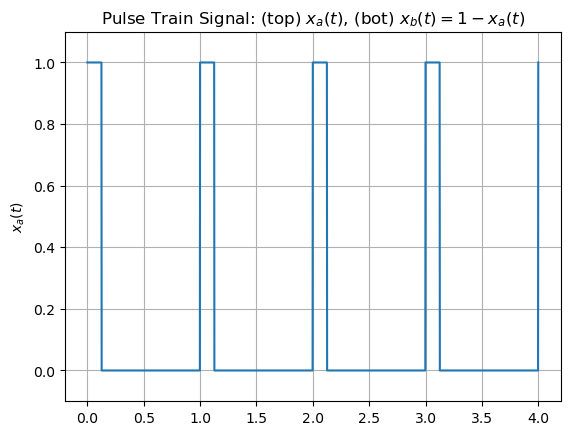

In [94]:
tau = 4/32; fs = 32*16; t0 = 0 # note t0 = tau/2
t,x = pulse_train(4,fs,tau,t0)
plt.plot(t,x) # Just a plot of xa(t)
plt.ylim([-.1,1.1])
plt.grid()
plt.ylabel(r'$x_a(t)$')
plt.title(r'Pulse Train Signal: (top) $x_a(t)$, (bot) $x_b(t) = 1-x_a(t)$');

